<a href="https://colab.research.google.com/github/SanchitVj1799/SDSS_DR16_Data_Analysis/blob/master/SDSS_DR16_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Methods used here:
1. Logistic Regression
2. Support Vector Machines**
3. Decision Tree
4. K Nearest Neighbors
5. Ensemble Methods(Random Forest, Adaboost, Gradient Boost)

# Importing Required Libraries and Reading Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [0]:
df = pd.read_csv('/content/drive/My Drive/Datasets/Skyserver.csv')

In [4]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


# Exploratory Data Analysis

In [5]:
df.shape

(10000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [8]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

There is no compelling reason to have a deep understanding of stars, system or quasars - yet we would already be able to advise which features are probably not going to be identified with the target variable 'class'. 

objid and specobjid are only identifiers for getting to the rows back when they were put away in the original databank. Along these lines we won't need them for classification as they are not identified with the result. 

Significantly more: The features 'run', 'rerun', 'camcol' and 'field' are values which describe portions of the camera right when mentioning the objective fact, for example 'run' speaks to the comparing check which caught the oject.

We'll drop these features.

In [9]:
df.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 'fiberid'], axis = 1, inplace= True)
df.head(3)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023


In [10]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

# Data Visualization

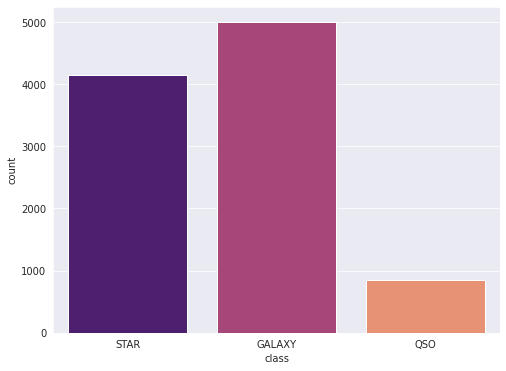

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.countplot(df['class'], palette = 'magma')

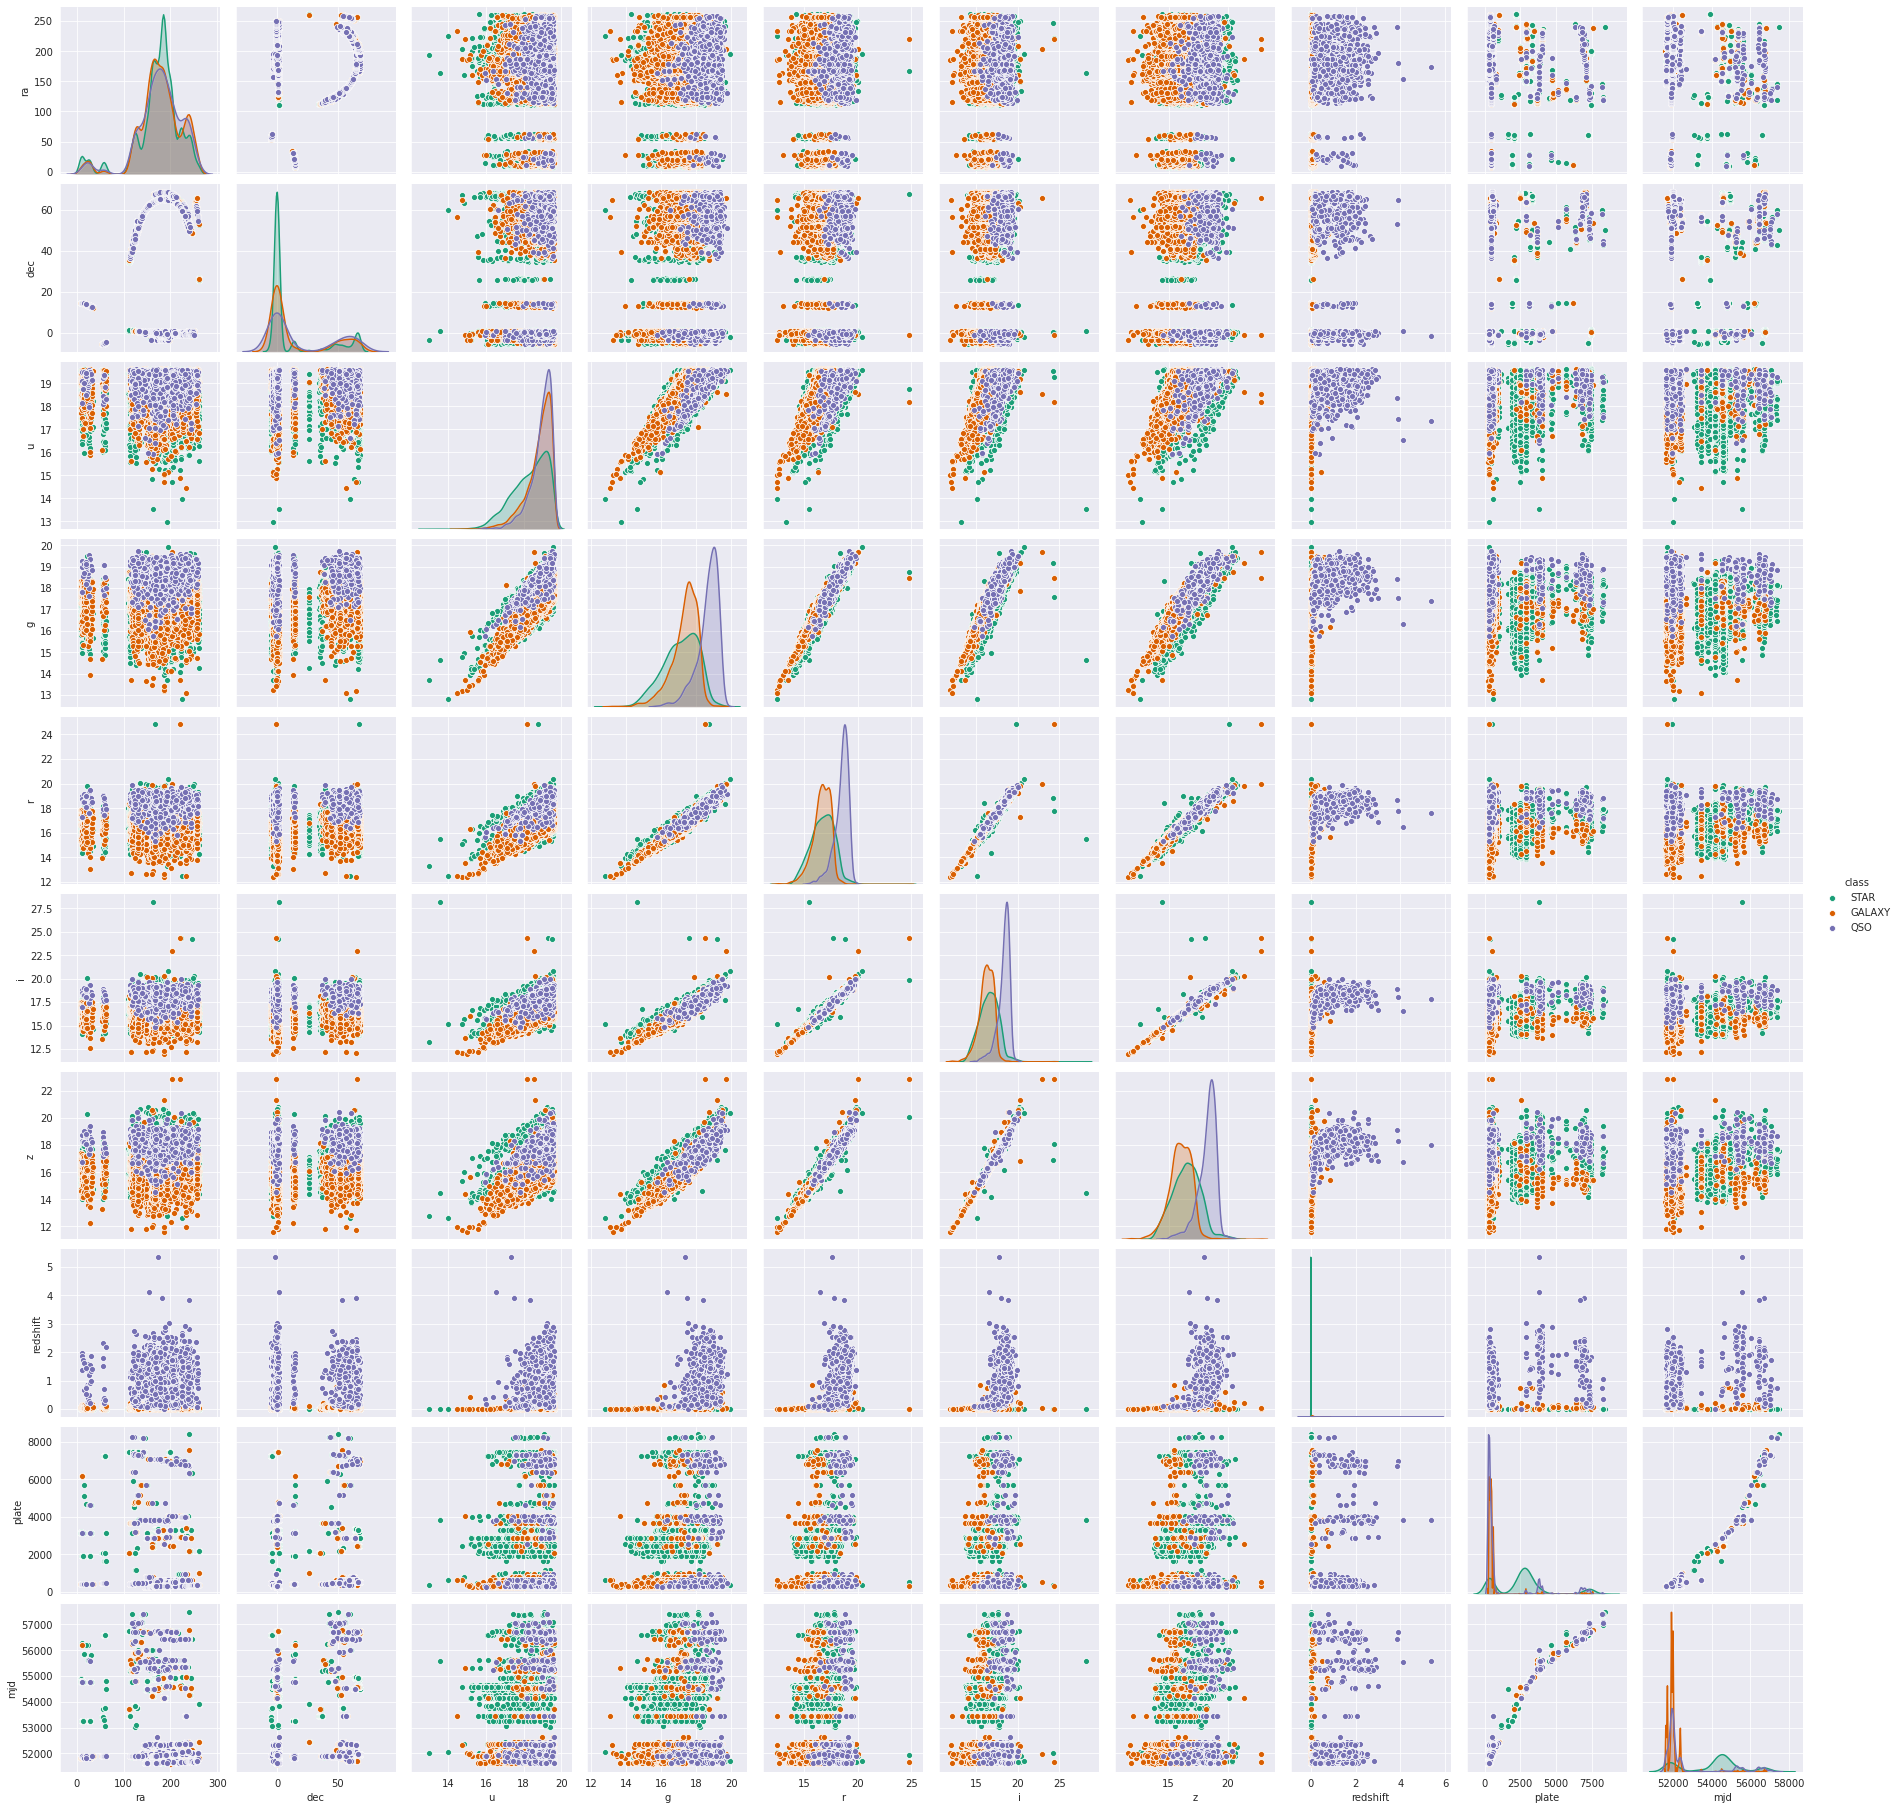

In [12]:
sns.pairplot(data = df, palette = 'Dark2', hue = 'class')

Using Boxplot to get a picture about outliers

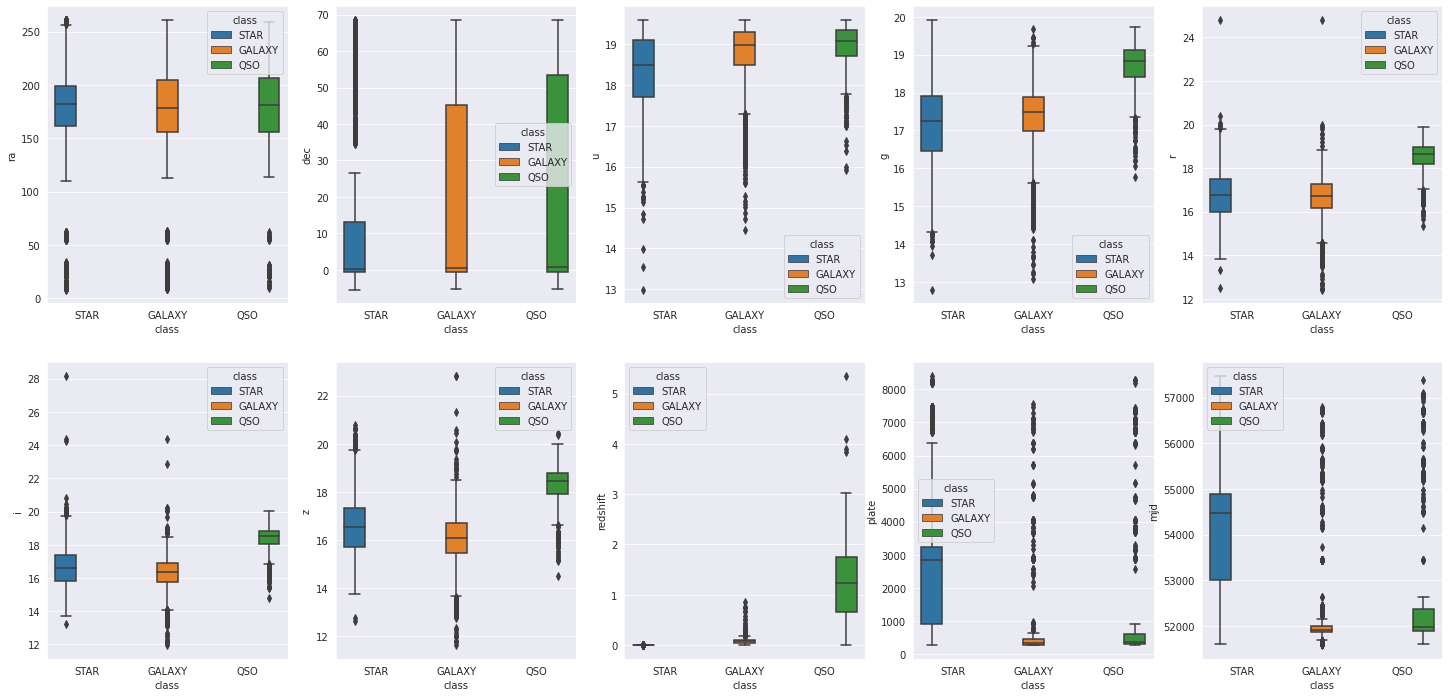

In [13]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'class', y = 'ra', hue = 'class', data = df)
sns.boxplot(ax=ax2, x = 'class', y = 'dec', hue = 'class', data = df)
sns.boxplot(ax=ax3, x = 'class', y = 'u', hue = 'class', data = df)
sns.boxplot(ax=ax4, x = 'class', y = 'g', hue = 'class', data = df)
sns.boxplot(ax=ax5, x = 'class', y = 'r', hue = 'class', data = df)
sns.boxplot(ax=ax6, x = 'class', y = 'i', hue = 'class', data = df)
sns.boxplot(ax=ax7, x = 'class', y = 'z', hue = 'class', data = df)
sns.boxplot(ax=ax8, x = 'class', y = 'redshift', hue = 'class', data = df)
sns.boxplot(ax=ax9, x = 'class', y = 'plate', hue = 'class', data = df)
sns.boxplot(ax=ax10, x = 'class', y = 'mjd', hue = 'class', data = df)

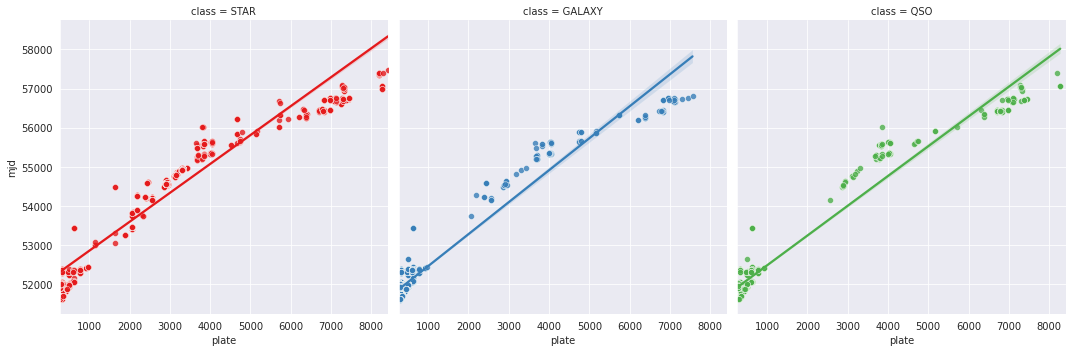

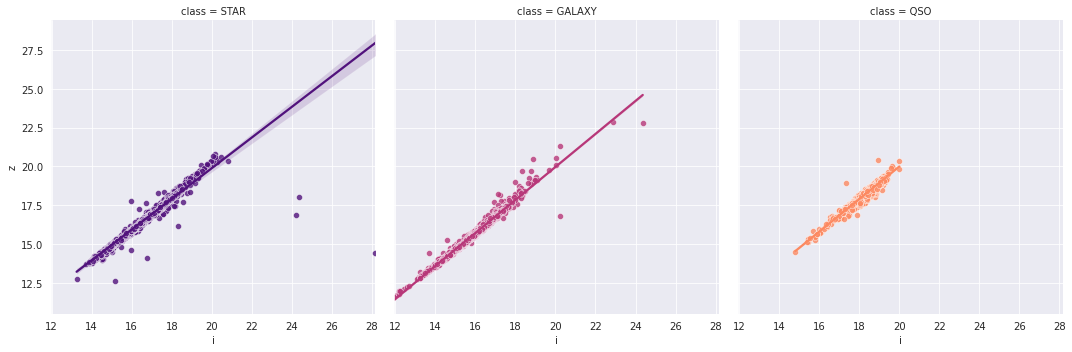

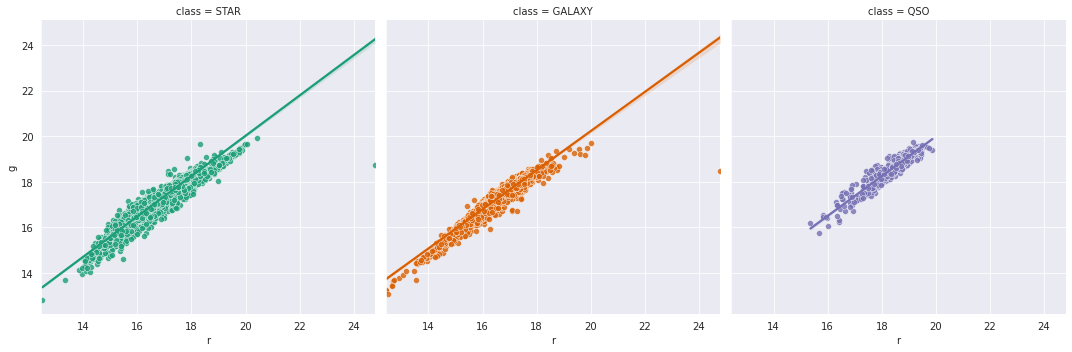

In [14]:
sns.lmplot(x = 'plate', y='mjd', data = df, hue='class', col = 'class', palette='Set1', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'i', y='z', data = df, hue='class', col = 'class', palette='magma', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})
sns.lmplot(x = 'r', y='g', data = df, hue='class', col = 'class', palette='Dark2', scatter_kws= {'edgecolor':'white', 'alpha':0.8, 'linewidths': 0.5})

The redshift can be an estimate(!) for the distance from the earth to a object in space.

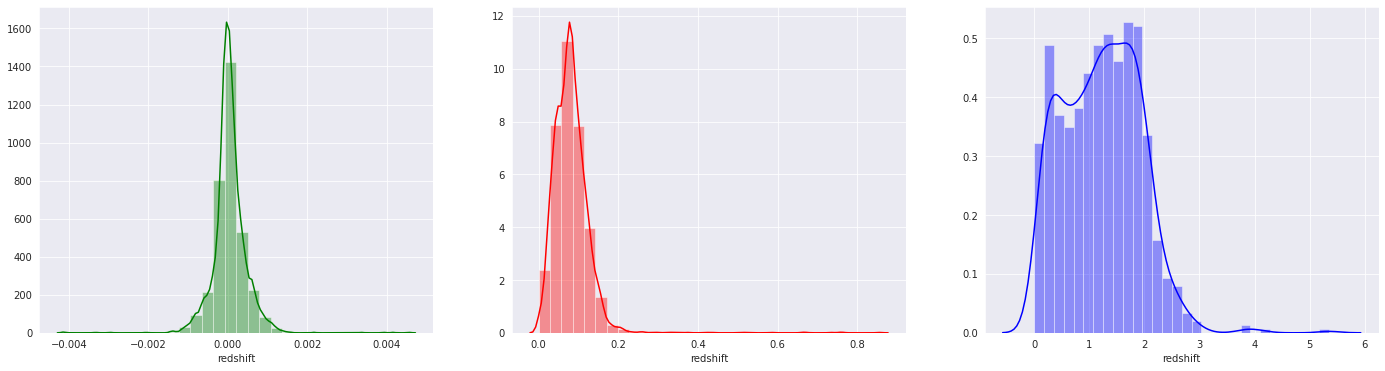

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.distplot(df[df['class'] == 'STAR'].redshift, ax = ax1, bins = 30, color = 'g')
sns.distplot(df[df['class'] == 'GALAXY'].redshift, ax = ax2, bins = 30, color = 'r')
sns.distplot(df[df['class'] == 'QSO'].redshift, ax = ax3, bins = 30, color = 'b')

In [16]:
df.var()

ra          2.283257e+03
dec         6.356554e+02
u           6.866708e-01
g           8.938893e-01
r           1.140121e+00
i           1.303718e+00
z           1.447661e+00
redshift    1.511453e-01
plate       3.199728e+06
mjd         2.283576e+06
dtype: float64

Correlation using heatmap

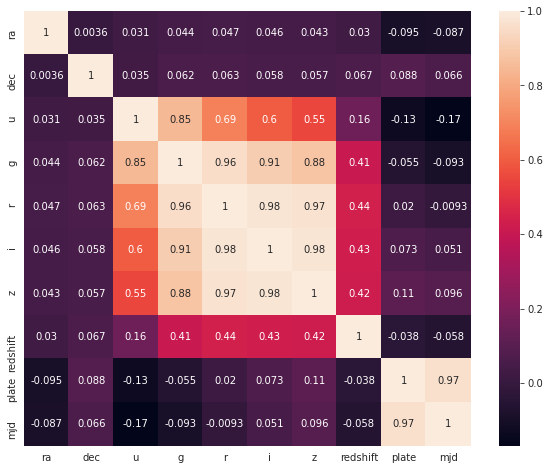

In [17]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

# Feature Engineering

Encoding Class labels to integers

In [18]:
labels = {'STAR':1, 'GALAXY':2, 'QSO':3}
df.replace({'class':labels}, inplace = True)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,1,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,1,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,2,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,1,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,1,0.000590,3306,54922


Dimension Reduction using PCA

As we saw in heatmap of correlation that features u, g, r, i, z are highly correlating so we will use PCA on them and reduce 5 features to 3 features for better accuracy.

In [19]:
pca = PCA(n_components = 3)
df_pca = pca.fit_transform(df[['u', 'g', 'r', 'i', 'z']])

df = pd.concat((df, pd.DataFrame(df_pca)), axis = 1)
df.rename({0:'F1', 1:'F2', 2:'F3'}, axis = 1, inplace = True)
df.drop(['u', 'g', 'r', 'i', 'z'], axis = 1, inplace = True)
df.head(3)

,ra,dec,class,redshift,plate,mjd,F1,F2,F3
0,183.531326,0.089693,1,-0.000009,3306,54922,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,1,-0.000055,323,51615,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,2,0.123111,287,52023,1.297604,-0.590023,0.140338


Data separation into features and labels

In [0]:
X = df.drop('class', axis = 1).values
y = df['class'].values

Splitting data into train and test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Because of presence of outliers we will be using RobustScaler to perform scaling on the data. For more about it look here:
https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

In [0]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

# Time to Train

Logistic Regression 

In [23]:
lr = LogisticRegression(max_iter=120)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Classification Report: \n ', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
lr_train_acc = lr.score(X_train, y_train)
print('Training Score: ', lr_train_acc)
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
                precision    recall  f1-score   support

           1       0.98      1.00      0.99      1215
           2       0.99      0.98      0.98      1519
           3       0.96      0.95      0.96       266

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix: 
 [[1213    0    2]
 [  28 1483    8]
 [   1   11  254]]
Training Score:  0.9868571428571429
Testing Score:  0.9833333333333333


Support Vector Classification

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
svc_train_acc = svc.score(X_train, y_train)
print('Training Score: ', svc_train_acc)
svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      1.00      0.99      1215
           2       0.99      0.97      0.98      1519
           3       0.97      0.97      0.97       266

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix: 
 [[1213    2    0]
 [  31 1480    8]
 [   1    6  259]]
Training Score:  0.9865714285714285
Testing Score:  0.984


Decision Tree Classifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
dt_train_acc = dt.score(X_train, y_train)
print('Training Score: ', dt_train_acc)
dt_test_acc = dt.score(X_test, y_test)
print('Testing Score: ', dt_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1215
           2       0.99      0.99      0.99      1519
           3       0.94      0.96      0.95       266

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1214    1    0]
 [   3 1500   16]
 [   1    9  256]]
Training Score:  1.0
Testing Score:  0.99


Ensemble Methods

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
rf_train_acc = rf.score(X_train, y_train)
print('Training Score: ', rf_train_acc)
rf_test_acc = rf.score(X_test, y_test)
print('Testing Score: ', rf_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1215
           2       1.00      0.98      0.99      1519
           3       0.95      0.98      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [  11 1495   13]
 [   1    5  260]]
Training Score:  1.0
Testing Score:  0.9893333333333333


In [27]:
adb = AdaBoostClassifier(rf)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
adb_train_acc = adb.score(X_train, y_train)
print('Training Score: ', adb_train_acc)
adb_test_acc = adb.score(X_test, y_test)
print('Testing Score: ', adb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1215
           2       0.99      0.98      0.99      1519
           3       0.95      0.97      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [  11 1494   14]
 [   1    6  259]]
Training Score:  1.0
Testing Score:  0.9886666666666667


In [28]:
gdb = GradientBoostingClassifier()
gdb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
print('Classification Report: \n0', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = gdb.score(X_train, y_train)
print('Training Score: ', gdb_train_acc)
gdb_test_acc = gdb.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
0               precision    recall  f1-score   support

           1       0.99      1.00      0.99      1215
           2       0.99      0.98      0.99      1519
           3       0.95      0.97      0.96       266

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Confusion Matrix: 
 [[1213    2    0]
 [  11 1494   14]
 [   1    6  259]]
Training Score:  1.0
Testing Score:  0.9906666666666667


K Nearest Neighbors Classification

In [0]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Plotting error rate vs. number of neighbors

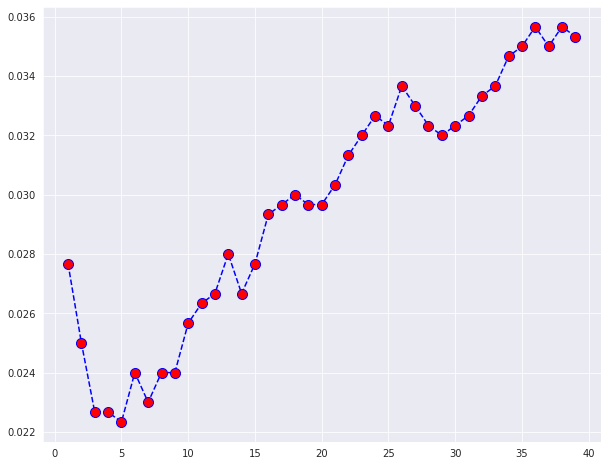

In [30]:
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

In [31]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
knn_train_acc = knn.score(X_train, y_train)
print('Training Score: ', knn_train_acc)
knn_test_acc = knn.score(X_test, y_test)
print('Testing Score: ', knn_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98      1215
           2       0.99      0.97      0.98      1519
           3       0.97      0.97      0.97       266

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Confusion Matrix: 
 [[1203   12    0]
 [  40 1471    8]
 [   1    6  259]]
Training Score:  0.9845714285714285
Testing Score:  0.9776666666666667
